In [1]:
import numpy as np
import pandas as pd
import os

from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
os.getcwd()

'/Users/wenyang/PROJECT_MASTER/DataAnalysis_COVID2019'

In [42]:
confirmed_df = pd.read_csv("COVID-19-master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv")
death_df = pd.read_csv("COVID-19-master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Deaths.csv")
recover_df = pd.read_csv("COVID-19-master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Recovered.csv")

In [43]:
confirmed_df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20
0,Anhui,Mainland China,31.82571,117.2264,1,9,15,39,60,70,...,962,973,982,986,987,988,989,989,989,989
1,Beijing,Mainland China,40.18238,116.4142,14,22,36,41,68,80,...,380,381,387,393,395,396,399,399,399,400
2,Chongqing,Mainland China,30.05718,107.8740,6,9,27,57,75,110,...,551,553,555,560,567,572,573,575,576,576
3,Fujian,Mainland China,26.07783,117.9895,1,5,10,18,35,59,...,287,290,292,293,293,293,293,293,293,294
4,Gansu,Mainland China,36.06110,103.8343,0,2,2,4,7,14,...,90,91,91,91,91,91,91,91,91,91


In [44]:
confirmed_df.shape

(94, 39)

In [45]:
confirmed_df = confirmed_df.drop("Lat", axis=1).drop("Long", axis=1)
death_df = death_df.drop("Lat", axis=1).drop("Long", axis=1)
recover_df = recover_df.drop("Lat", axis=1).drop("Long", axis=1)

In [46]:
confirmed_df.head()

,Province/State,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20
0,Anhui,Mainland China,1,9,15,39,60,70,106,152,...,962,973,982,986,987,988,989,989,989,989
1,Beijing,Mainland China,14,22,36,41,68,80,91,111,...,380,381,387,393,395,396,399,399,399,400
2,Chongqing,Mainland China,6,9,27,57,75,110,132,147,...,551,553,555,560,567,572,573,575,576,576
3,Fujian,Mainland China,1,5,10,18,35,59,80,84,...,287,290,292,293,293,293,293,293,293,294
4,Gansu,Mainland China,0,2,2,4,7,14,19,24,...,90,91,91,91,91,91,91,91,91,91


In [49]:
confirmed_df_by_days = confirmed_df.iloc[:, 2:].rename(columns=getDaysDiff).fillna(0)
death_df_by_days = death_df.iloc[:, 2:].rename(columns=getDaysDiff).fillna(0)
recover_df_by_days = recover_df.iloc[:, 2:].rename(columns=getDaysDiff).fillna(0)

In [51]:
confirmed_df_by_days.head()

,0,1,2,3,4,5,6,7,8,9,...,25,26,27,28,29,30,31,32,33,34
0,1,9,15,39,60,70,106,152,200,237,...,962,973,982,986,987,988,989,989,989,989
1,14,22,36,41,68,80,91,111,114,139,...,380,381,387,393,395,396,399,399,399,400
2,6,9,27,57,75,110,132,147,182,211,...,551,553,555,560,567,572,573,575,576,576
3,1,5,10,18,35,59,80,84,101,120,...,287,290,292,293,293,293,293,293,293,294
4,0,2,2,4,7,14,19,24,26,29,...,90,91,91,91,91,91,91,91,91,91


In [22]:
starting_date = "1/22/20"

In [32]:
def getDays(cur_date):
    m, d, y = cur_date.split("/")
    return (int(m)*31+int(d))

In [41]:
def getDaysDiff(cur_date, start_date=starting_date):
    m, d, y = cur_date.split("/")
    return getDays(cur_date) - getDays(starting_date)

In [34]:
getDayDiff("01/27/20")

5

In [52]:
name2index = {}
index2state = {}
for index in range(len(confirmed_df)):
    country, state = confirmed_df.iloc[index, 1], confirmed_df.iloc[index, 0]
    if pd.isnull(confirmed_df.iloc[index, 0]):
        name = country
    else:
        name = country + "_" + state
    name2index[name] = index
    index2state[index] = name

## 确诊人数(Confirmed Cases)

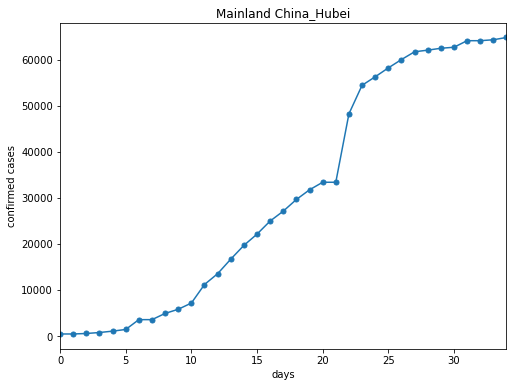

In [54]:
name = "Mainland China_Hubei"
temp_df = confirmed_df_by_days.iloc[name2index[name], :];
plt.figure(figsize=(8,6))
temp_df.plot(title=name, marker='.', markersize=10)
plt.xlabel("days")
plt.ylabel("confirmed cases")
plt.show()

## 死亡人数(Death Cases)

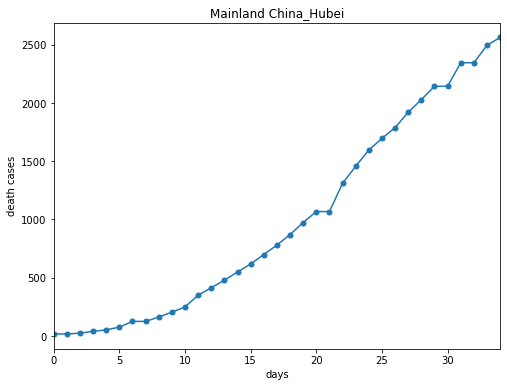

In [55]:
name = "Mainland China_Hubei"
temp_df = death_df_by_days.iloc[name2index[name], :];
plt.figure(figsize=(8,6))
temp_df.plot(title=name, marker='.', markersize=10)
plt.xlabel("days")
plt.ylabel("death cases")
plt.show()

## 死亡率(Death Rate)

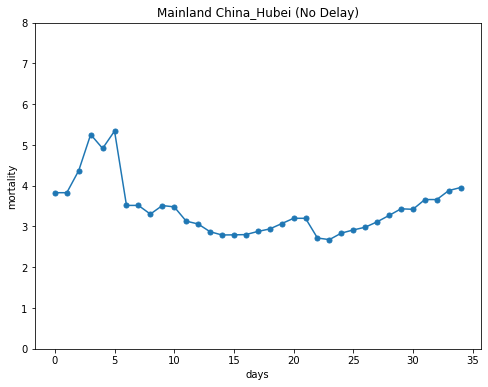

In [56]:
name = "Mainland China_Hubei"
plt.figure(figsize=(8,6))
no_delay_rate = 100*death_df_by_days.iloc[name2index[name], :]/confirmed_df_by_days.iloc[name2index[name], :]
plt.plot(no_delay_rate, marker='.', markersize=10)
plt.xlabel("days")
plt.ylabel("mortality")
plt.ylim(0, 8);
plt.title(name + " (No Delay)")
plt.savefig('hubei_no_delay.png')
plt.show()


In [57]:
DELAY_DAYS = 3

In [58]:
index2earlierIndex = {}
visited_days = []
ptr = 0
for index, day in enumerate(death_df_by_days):
    if day - DELAY_DAYS >= 0:
        target_day = day - DELAY_DAYS
        while ptr < len(visited_days):
            if visited_days[ptr] <= target_day <= visited_days[ptr+1]:
                if target_day - visited_days[ptr] <= visited_days[ptr+1] - target_day:
                    index2earlierIndex[index] = ptr
                else:
                    index2earlierIndex[index] = ptr + 1
                break
            else:
                ptr += 1
    else:
        index2earlierIndex[index] = None
    visited_days.append(day)

In [59]:
actual_rate = []
cur_rate = None
for index in sorted(index2earlierIndex.keys()):
    earlier_index = index2earlierIndex[index]
    if earlier_index:
        confirm_case = confirmed_df_by_days.iloc[name2index[name], earlier_index]
        death = death_df_by_days.iloc[name2index[name], index]
        cur_rate = round(death/confirm_case*100, 2)
    actual_rate.append(cur_rate)
    

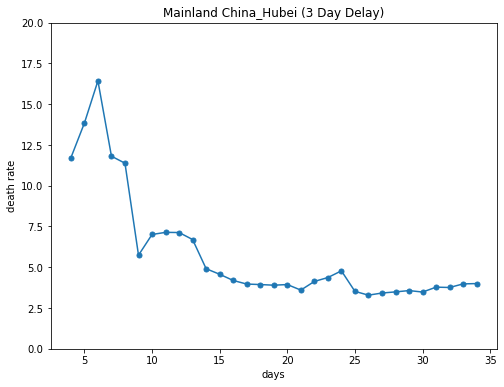

In [60]:
name = "Mainland China_Hubei"
plt.figure(figsize=(8,6))
plt.plot(visited_days, actual_rate, marker='.', markersize=10)
plt.xlabel("days")
plt.ylabel("death rate")
plt.ylim(0, 20);
plt.title(name + " (3 Day Delay)")
plt.show()

In [61]:
DELAY_DAYS = 7

In [62]:
index2earlierIndex = {}
visited_days = []
ptr = 0
name = "Mainland China_Hubei"
for index, day in enumerate(death_df_by_days):
    if day - DELAY_DAYS >= 0:
        target_day = day - DELAY_DAYS
        while ptr < len(visited_days):
            if visited_days[ptr] <= target_day <= visited_days[ptr+1]:
                if target_day - visited_days[ptr] <= visited_days[ptr+1] - target_day:
                    index2earlierIndex[index] = ptr
                else:
                    index2earlierIndex[index] = ptr + 1
                break
            else:
                ptr += 1
    else:
        index2earlierIndex[index] = None
    visited_days.append(day)

In [63]:
actual_rate = []
cur_rate = None
for index in sorted(index2earlierIndex.keys()):
    earlier_index = index2earlierIndex[index]
    if earlier_index:
        confirm_case = confirmed_df_by_days.iloc[name2index[name], earlier_index]
        death = death_df_by_days.iloc[name2index[name], index]
        cur_rate = round(death/confirm_case*100, 2)
    actual_rate.append(cur_rate)

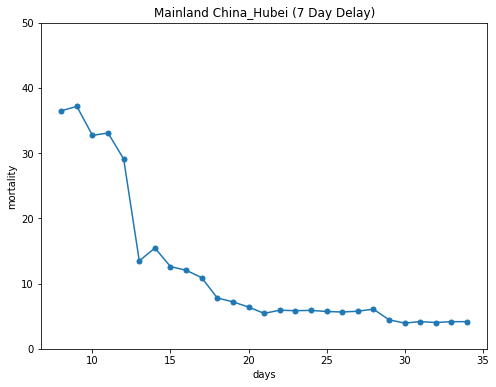

In [64]:
name = "Mainland China_Hubei"
plt.figure(figsize=(8,6))
plt.plot(visited_days, actual_rate, marker='.', markersize=10)
plt.xlabel("days")
plt.ylabel("mortality")
plt.ylim(0, 50);
plt.title("{} ({} Day Delay)".format(name, DELAY_DAYS))
plt.savefig('hubei_7_day.png')
plt.show()

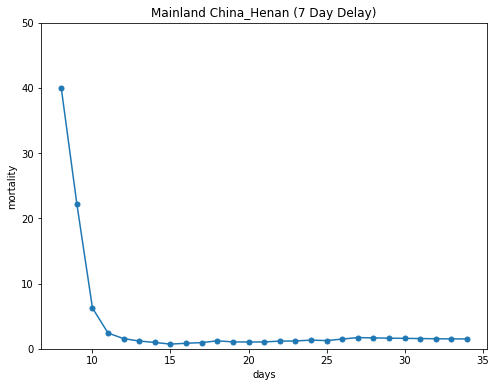

In [65]:
name = "Mainland China_Henan"
actual_rate = []
cur_rate = None
for index in sorted(index2earlierIndex.keys()):
    earlier_index = index2earlierIndex[index]
    if earlier_index:
        confirm_case = confirmed_df_by_days.iloc[name2index[name], earlier_index]
        death = death_df_by_days.iloc[name2index[name], index]
        cur_rate = round(death/confirm_case*100, 2)
    actual_rate.append(cur_rate)
plt.figure(figsize=(8,6))
plt.plot(visited_days, actual_rate, marker='.', markersize=10)
plt.xlabel("days")
plt.ylabel("mortality")
plt.ylim(0, 50);
plt.title("{} ({} Day Delay)".format(name, DELAY_DAYS))
plt.show()

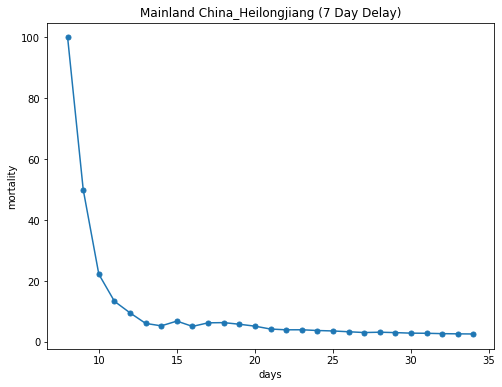

In [66]:
name = "Mainland China_Heilongjiang"
actual_rate = []
cur_rate = None
for index in sorted(index2earlierIndex.keys()):
    earlier_index = index2earlierIndex[index]
    if earlier_index:
        confirm_case = confirmed_df_by_days.iloc[name2index[name], earlier_index]
        death = death_df_by_days.iloc[name2index[name], index]
        if death <= confirm_case:
            cur_rate = round(death/confirm_case*100, 2)
    actual_rate.append(cur_rate)
plt.figure(figsize=(8,6))
plt.plot(visited_days, actual_rate, marker='.', markersize=10)
plt.xlabel("days")
plt.ylabel("mortality")
plt.title("{} ({} Day Delay)".format(name, DELAY_DAYS))
plt.show()

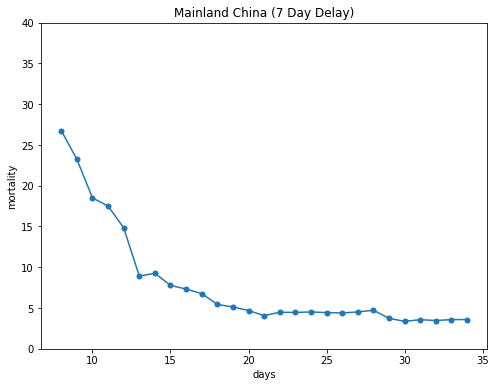

In [67]:
name = "Mainland China"
actual_rate = []
cur_rate = None
for index in sorted(index2earlierIndex.keys()):
    earlier_index = index2earlierIndex[index]
    if earlier_index:
        confirm_case = death = 0
        for keyName in name2index:
            if keyName.startswith("Mainland China"):
                confirm_case += confirmed_df_by_days.iloc[name2index[keyName], earlier_index]
                death += death_df_by_days.iloc[name2index[keyName], index]
        if death <= confirm_case:
            cur_rate = round(death/confirm_case*100, 2)
    actual_rate.append(cur_rate)
plt.figure(figsize=(8,6))
plt.plot(visited_days, actual_rate, marker='.', markersize=10)
plt.xlabel("days")
plt.ylabel("mortality")
plt.ylim(0, 40);
plt.title("{} ({} Day Delay)".format(name, DELAY_DAYS))
plt.savefig('Mainland_China_7_day.png')

plt.show()

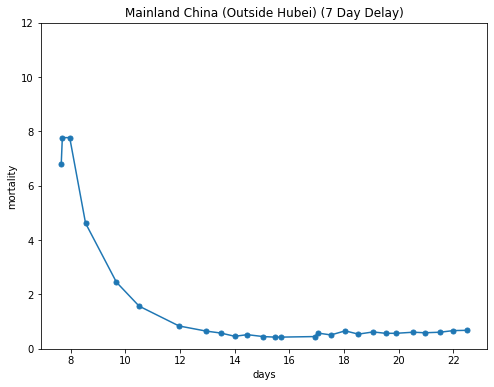

In [70]:
name = "Mainland China (Outside Hubei)"
actual_rate = []
cur_rate = None
for index in sorted(index2earlierIndex.keys()):
    earlier_index = index2earlierIndex[index]
    if earlier_index:
        confirm_case = death = 0
        for keyName in name2index:
            if keyName.startswith("Mainland China") and not keyName.endswith("Hubei"):
                confirm_case += confirmed_df_by_days.iloc[name2index[keyName], earlier_index]
                death += death_df_by_days.iloc[name2index[keyName], index]
        if death <= confirm_case:
            cur_rate = round(death/confirm_case*100, 2)
    actual_rate.append(cur_rate)
plt.figure(figsize=(8,6))
plt.plot(visited_days, actual_rate, marker='.', markersize=10)
plt.xlabel("days")
plt.ylabel("mortality")
plt.ylim(0, 12);
plt.title("{} ({} Day Delay)".format(name, DELAY_DAYS))
plt.savefig('Mainland_China_Except_Hubei_7_day.png')
plt.show()